# Lab 1 | Cleaning numerical data

## Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

1. Import the necessary libraries.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [182]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info).

In [183]:
#customer_df.head()

In [184]:
#customer_df.shape

In [185]:
#customer_df.info()

4. Rename the columns so they follow the PE8 (snake case).

In [186]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [187]:
customer_df = customer_df.rename(columns = {'employmentstatus': 'employment_status'})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change effective to date column to datetime format.

In [188]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

6. Check NaN values per column.

In [189]:
#customer_df.isna().sum()

7. Define a function that differentiates between continuous and discrete variables (Hint: A number of unique values might be useful). 
Store continuous data into a continuous variable and do the same for discrete and categorical.

In [190]:
def funk(df):
    categoricals = df.select_dtypes('object')
    discrete = df.select_dtypes('int64')
    continuous = df.select_dtypes('float64')
    return categoricals, discrete, continuous
categoricals, discrete, continuous = funk(customer_df)

8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [191]:
for col in categoricals:
    print(categoricals[col].value_counts(), '\n')

TU25694    1
UK59698    1
XK39439    1
YM24620    1
GJ63345    1
          ..
UO86707    1
VG58889    1
JX80723    1
HS45195    1
KB44286    1
Name: customer, Length: 9134, dtype: int64 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64 

F    4658
M    4476
Name: gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

P

9. Get categorical features.

In [192]:
#categoricals.head()

10. What should we do with the customer_id column?

In [193]:
customer_df0 = customer_df.copy()

In [194]:
# Customer is just a label, it doesn't store other information.
customer_df0 = customer_df.set_index('customer', drop=True)
customer_df0.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Lab 2 | Cleaning categorical data

1. Import the necessary libraries if you are starting a new notebook.

In [195]:
# Done

2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [196]:
continuous_df0 = customer_df0.select_dtypes('float64')

In [197]:
discrete_df0 = customer_df0.select_dtypes('int64')

3. Plot a correlation matrix, what can you see?

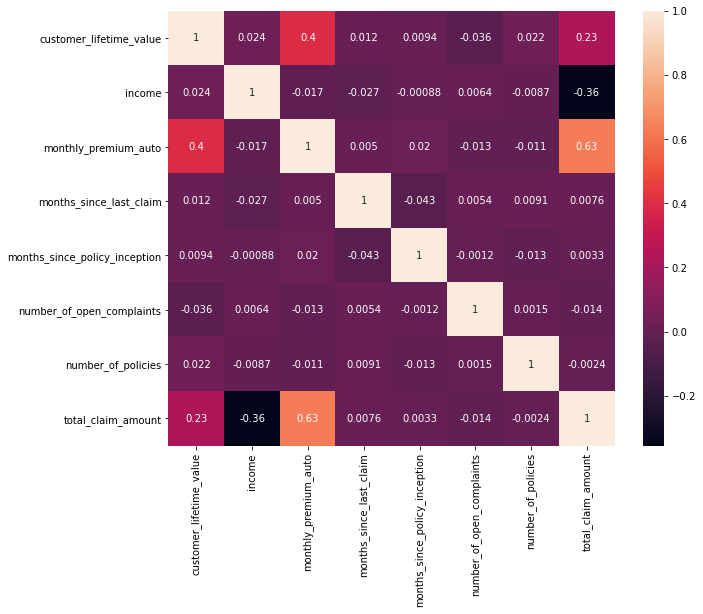

In [198]:
corr_matrix = customer_df0.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Only one pair of parameters are clearly correlated with each other, namely: 
- monthly_premium_auto with total_claim_amount (0.63)
Two other pair of parameters are correlated with each other:
- monthly_premium_auto with customer_lifetime_value (0.4)
- total_claim_amount with customer_lifetime_value (0.23) 

Besides, total_claim_amount and income have slightly negative correlated between each other (-0.36).

4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

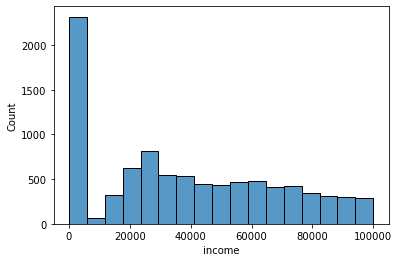

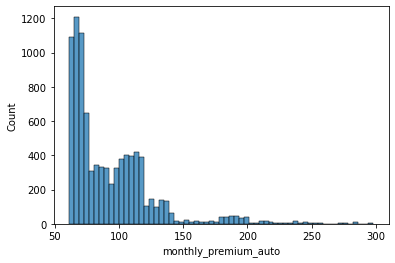

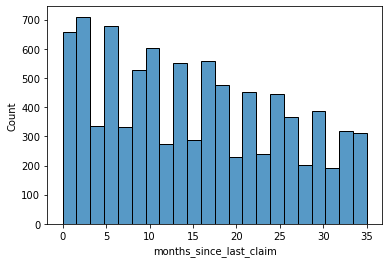

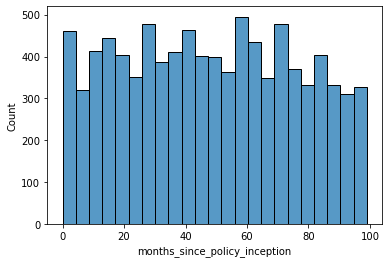

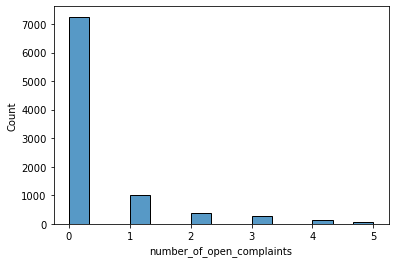

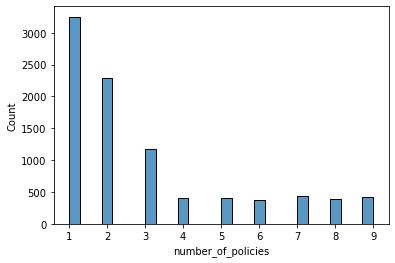

In [199]:
for col in discrete_df0.columns:
    sns.histplot(customer_df0[col])
    plt.show()

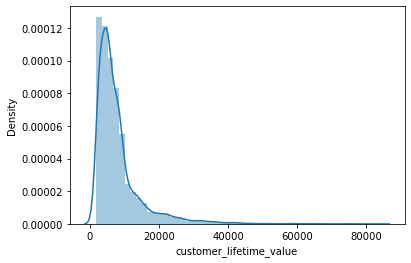

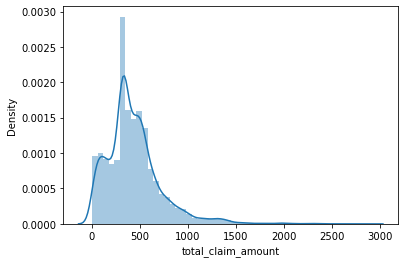

In [200]:
for col in customer_df0.select_dtypes(['float64']).columns:
    sns.distplot(customer_df0[col])
    plt.show()

5. What can you see in the plots?
- Some of the features must be ingeneered: for example, 'income' can't be zero for such a large proportion of customers. Most probably, the information hasn't been collected.

6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

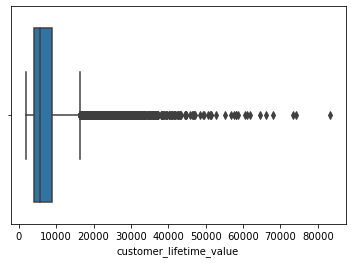

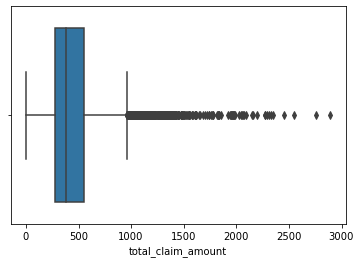

In [201]:
for col in customer_df0.select_dtypes(['float64']).columns:
    sns.boxplot(customer_df0[col])
    plt.show()

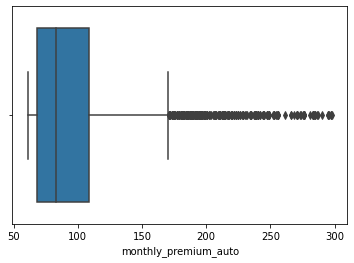

In [202]:
#Despite being integers, we can't really say that this column correspond to discrete values:
sns.boxplot(customer_df0['monthly_premium_auto'])
plt.show()

7. Have you found outliers? If you have, what should we do with them?
- Eventually we'll drop them if necessary, after checking our benchmark model with unprocessed data

8. Check nan values per column.
- See above question 6 of the first part.

9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.


The definition of continuous and discrete functions above isn't really satisfying. We'll try to redefine continuous and discrete in function of unique values. 

Arbitrarly: 
 * discrete < 100 unique values 
 * continuous >= 100 unique values

In [203]:
numericals0 = customer_df0.select_dtypes(np.number)
numericals0.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [204]:
print("number of unique values:", "\n")
for col in customer_df0.select_dtypes(np.number).columns:
    print(col, ":",  len(customer_df0[col].unique()))

number of unique values: 

customer_lifetime_value : 8041
income : 5694
monthly_premium_auto : 202
months_since_last_claim : 36
months_since_policy_inception : 100
number_of_open_complaints : 6
number_of_policies : 9
total_claim_amount : 5106


In [205]:
discrete0 = customer_df0[['months_since_last_claim','number_of_open_complaints','number_of_policies']]
discrete0.shape

(9134, 3)

In [206]:
continuous0 = customer_df0[['customer_lifetime_value', 'income','monthly_premium_auto','months_since_policy_inception','total_claim_amount']]
continuous0.shape

(9134, 5)

10. Get categorical features.

In [207]:
categoricals0 = customer_df0.select_dtypes('object')
categoricals0.shape

(9134, 14)

11. What should we do with the customer id column?
- Remove it from the features and set it to the index, since they are just a label (already done in previous lab) 

# Lab 3 | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

1. Open the categoricals variable we created before.


In [208]:
categoricals0.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


2. Plot all the categorical variables with the proper plot. What can you see?

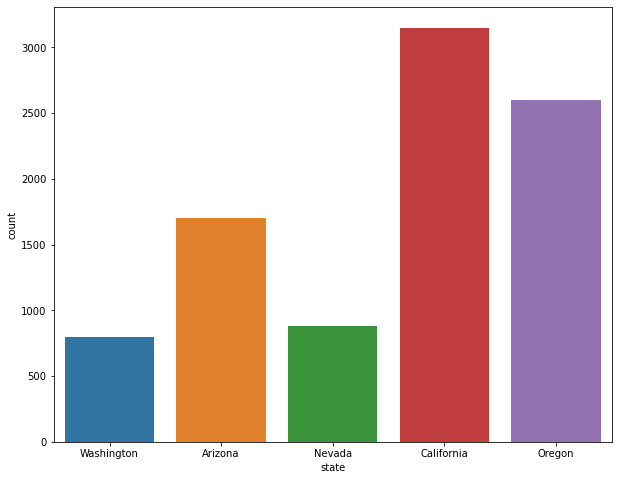

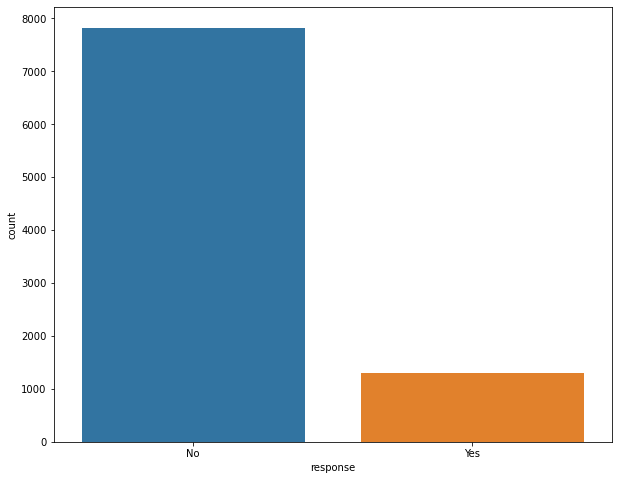

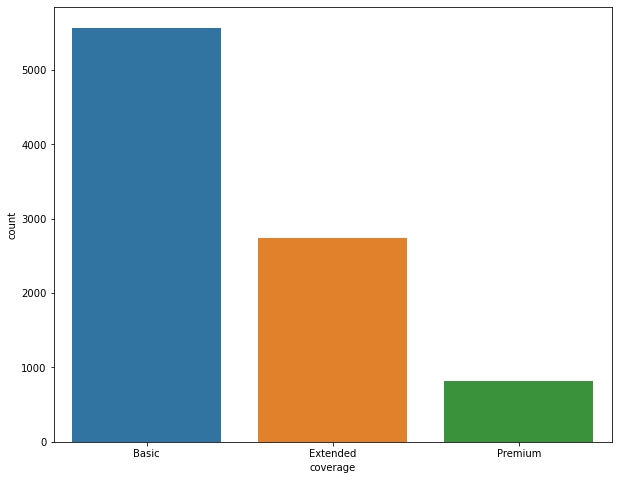

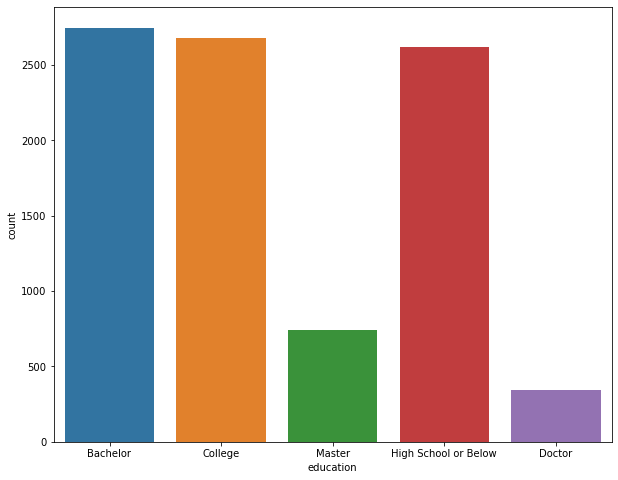

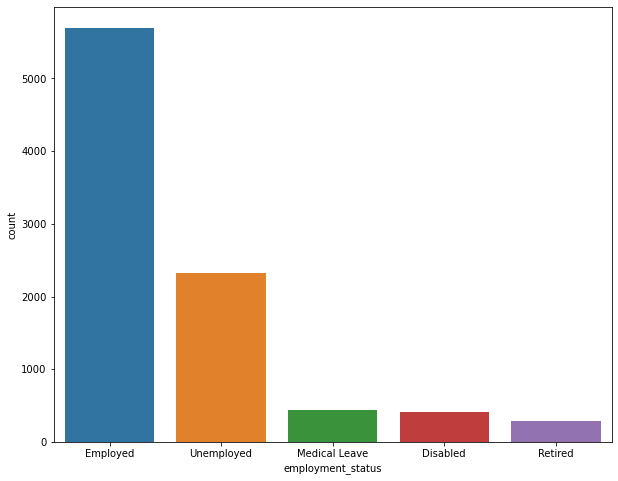

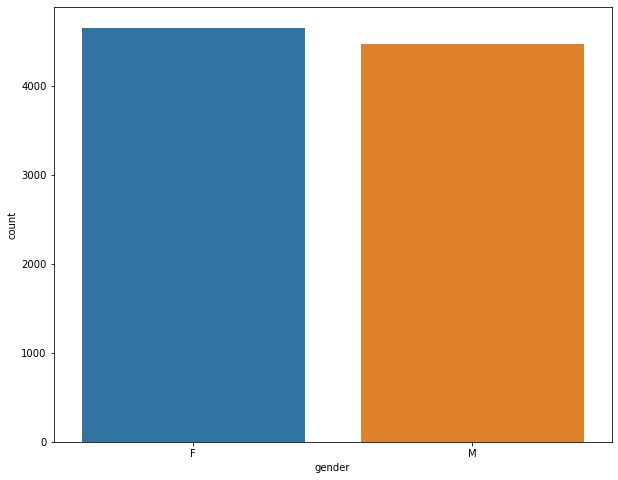

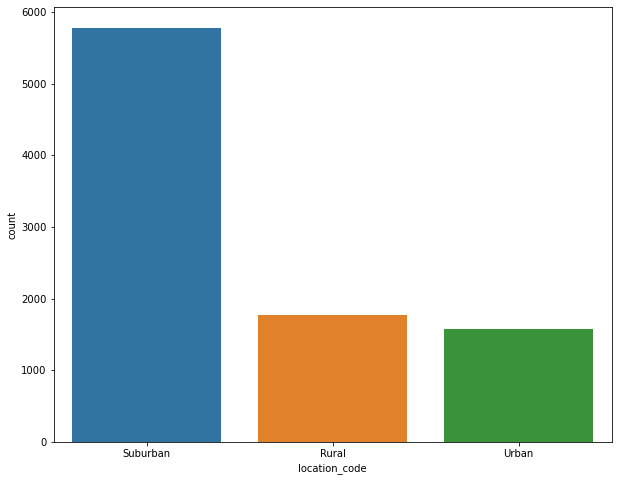

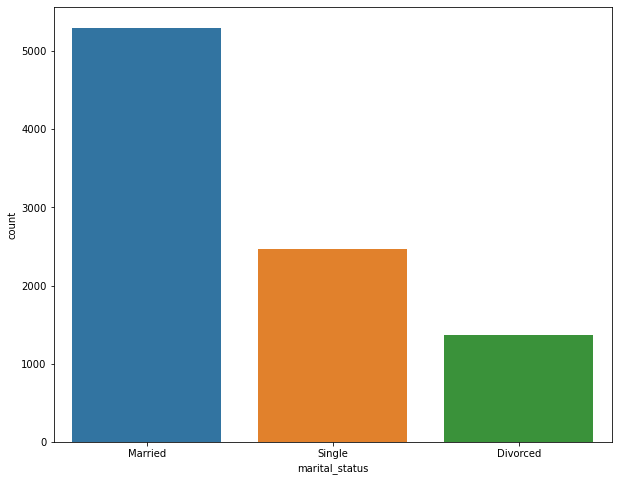

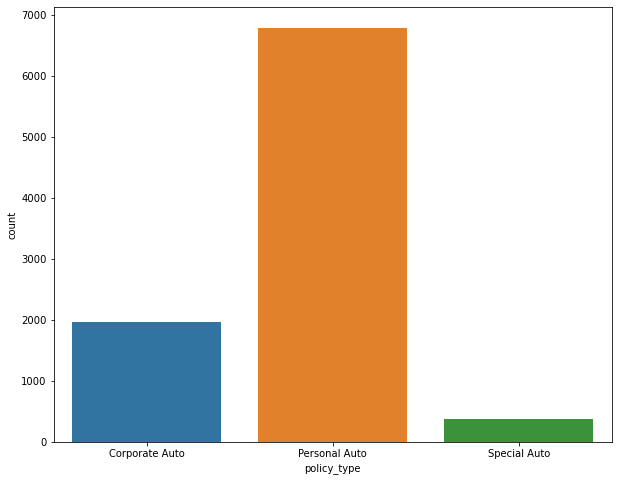

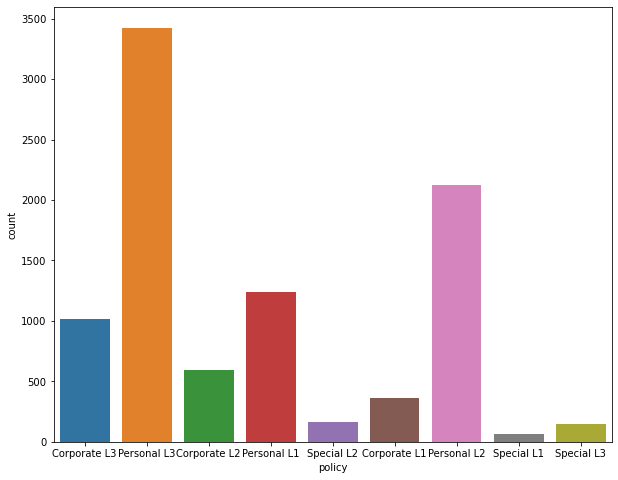

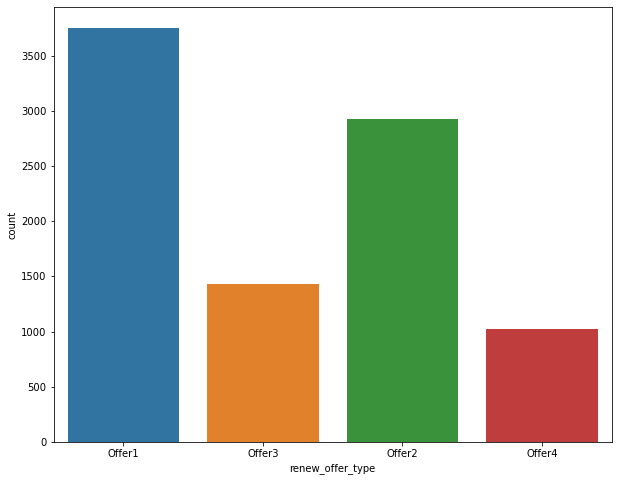

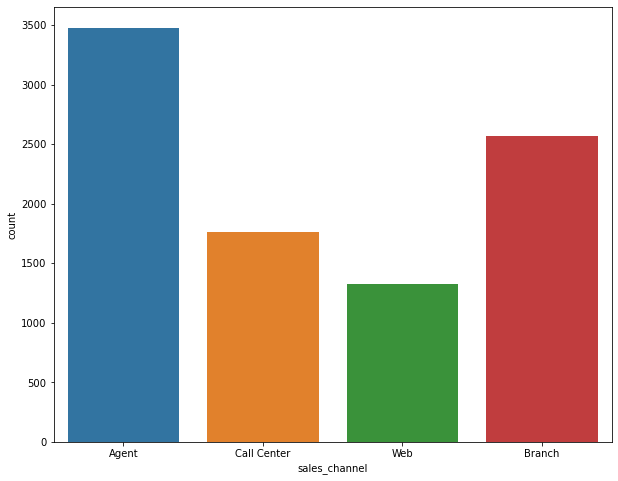

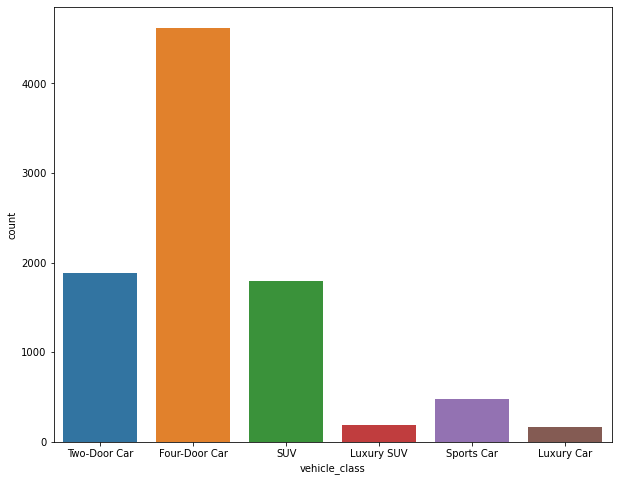

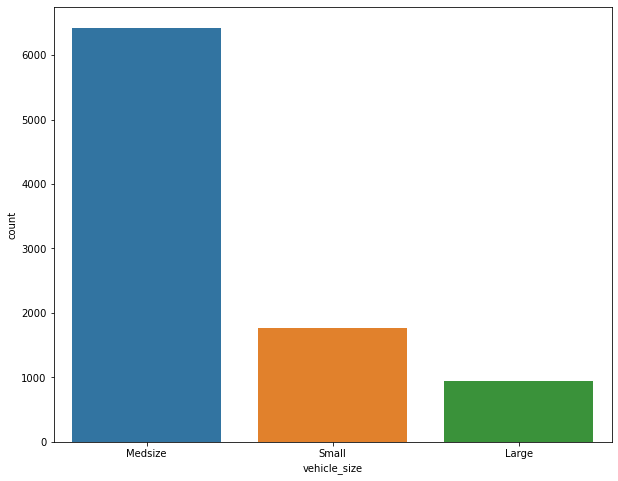

In [209]:
for col in categoricals0.columns:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.countplot(categoricals0[col])
    plt.show()

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [210]:
for col in customer_df0:
    print(customer_df0[col].value_counts(), '\n')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

2300.691547     6
6057.072080     6
6005.214792     6
8819.018934     6
4984.618655     6
               ..
12206.892080    1
3728.830130     1
2456.816647     1
2675.029491     1
4491.909095     1
Name: customer_lifetime_value, Length: 8041, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-01-28    169
2011-02-26    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161

4. Plot time variable. Can you extract something from it?

In [211]:
len(customer_df0['effective_to_date'].unique())
# Here we get the number of unique values

59

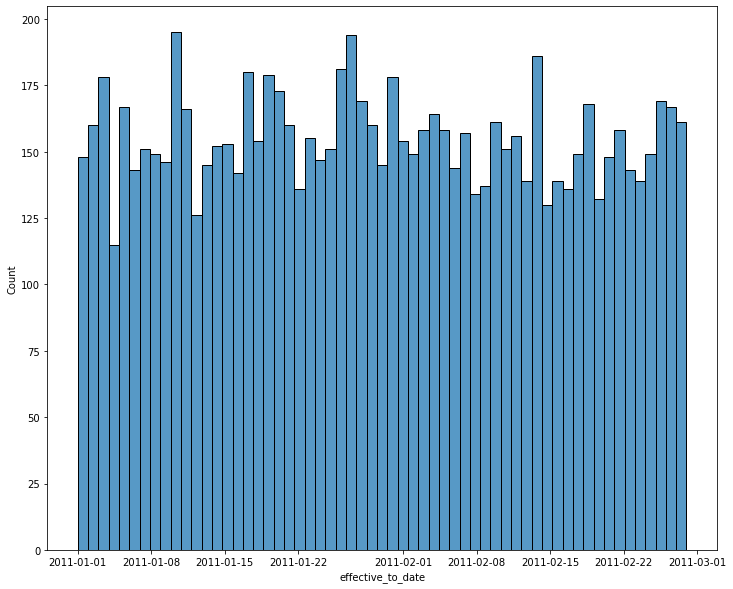

In [212]:
plt.subplots(figsize=(12, 10))
sns.histplot(customer_df0['effective_to_date'], bins = len(customer_df['effective_to_date'].unique()))
plt.show()

We can see that the 'effective_to_date' column is quite constant, we don't have significant outliers

# Lab 4 | Data cleaning and wrangling

### Instructions

So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

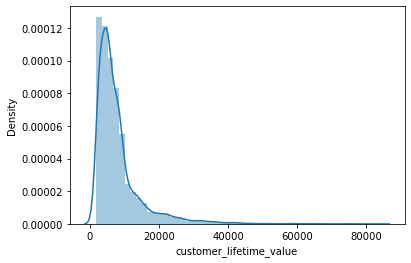

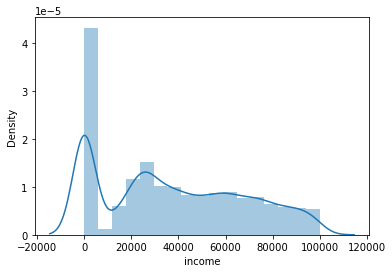

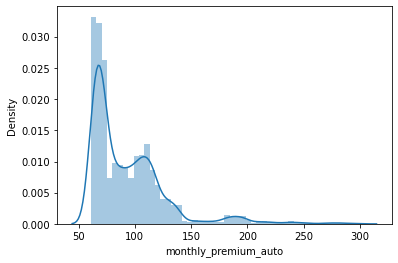

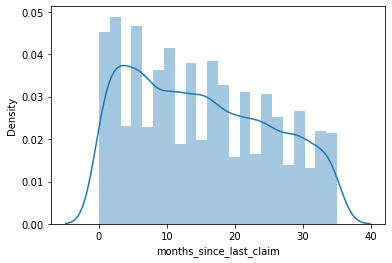

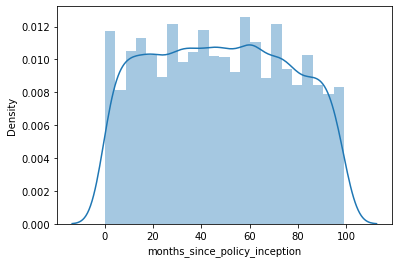

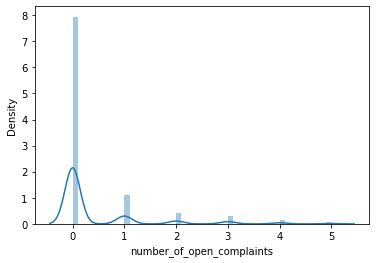

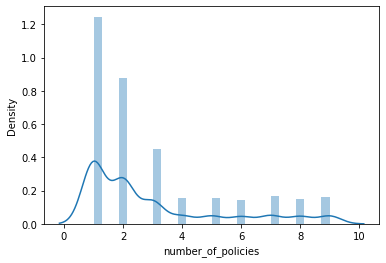

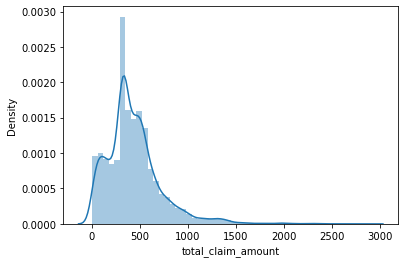

In [213]:
for col in customer_df0.select_dtypes(np.number).columns:
    sns.distplot(customer_df0[col])
    plt.show()

There are some zero values in 'income' column that seem unrealistic. Let's see what happens if we drop them

In [214]:
customer_df1 = customer_df0[customer_df0['income'] > 0]
print(f'Percentage lost: {100-len(customer_df1)/len(customer_df0)*100}')

Percentage lost: 25.36676155025181


Here we notice that if we drop zero income values, we lose 25% of the rows - this is too much. 

Let's see applying a log in continuous values 

In [215]:
log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) and x!=0 else np.NAN

In [216]:
continuous2 = continuous0.copy()

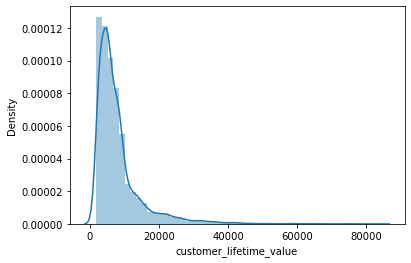

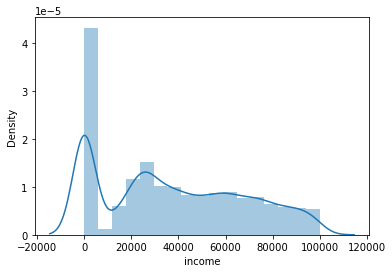

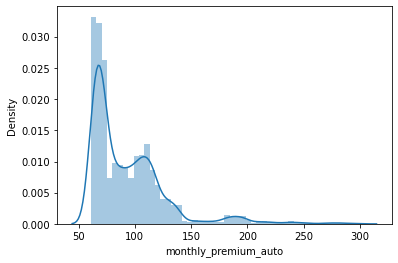

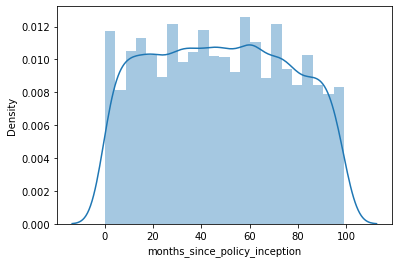

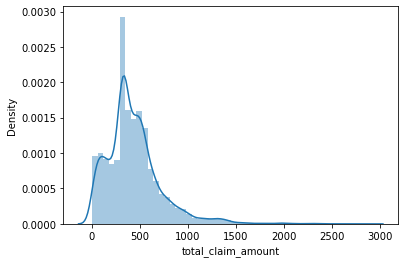

In [217]:
for col in continuous2.columns:
    sns.distplot(continuous2[col])
    plt.show()

In [218]:
for col in continuous2.columns:
    continuous2[col] = continuous2[col].apply(log_lmbda)
    continuous2[col] = continuous2[col].fillna(np.mean(continuous2[col]))

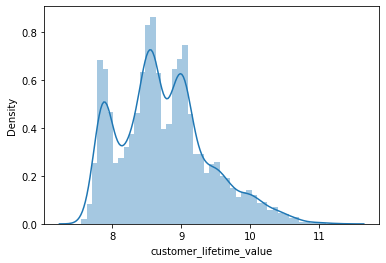

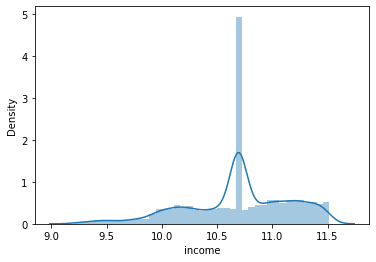

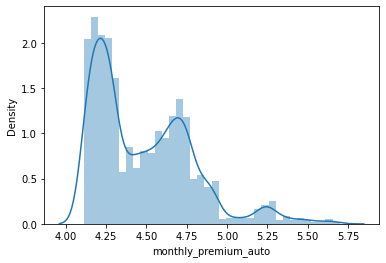

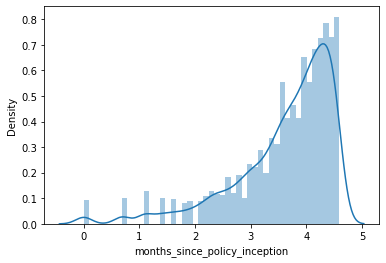

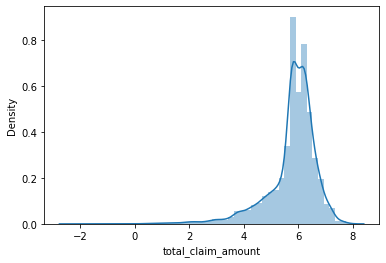

In [219]:
for col in continuous2.columns:
    sns.distplot(continuous2[col])
    plt.show()

In [220]:
continuous2.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
customer,,,,,
BU79786,7.924260,10.937988,4.234107,1.609438,5.952753
QZ44356,8.850738,10.694229,4.543295,3.737670,7.031268
AI49188,9.464008,10.794809,4.682131,3.637586,6.339428
WW63253,8.941920,10.694229,4.663439,4.174387,6.272653
HB64268,7.942253,10.688211,4.290459,3.784190,4.928202


In [221]:
discrete2 = discrete0.copy()
categoricals2 = categoricals0.copy()
discrete2.shape, categoricals2.shape

((9134, 3), (9134, 14))

In [222]:
df = pd.concat([discrete2, continuous2, categoricals2], axis=1)
df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,
BU79786,32,0,1,7.924260,10.937988,4.234107,1.609438,5.952753,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,13,0,8,8.850738,10.694229,4.543295,3.737670,7.031268,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,18,0,2,9.464008,10.794809,4.682131,3.637586,6.339428,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,18,0,7,8.941920,10.694229,4.663439,4.174387,6.272653,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,12,0,1,7.942253,10.688211,4.290459,3.784190,4.928202,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [223]:
#df.isna().sum()

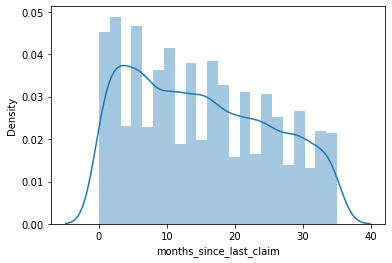

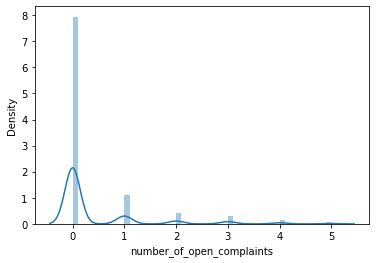

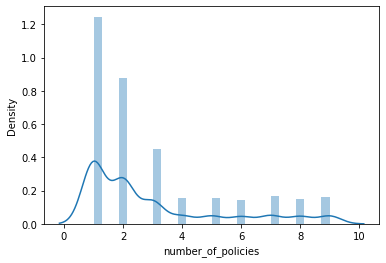

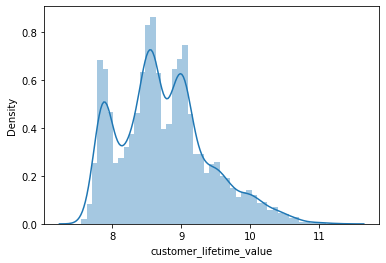

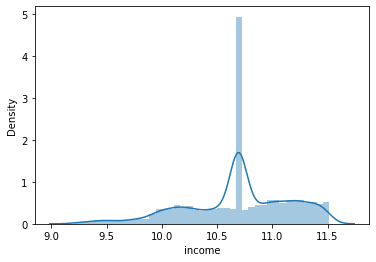

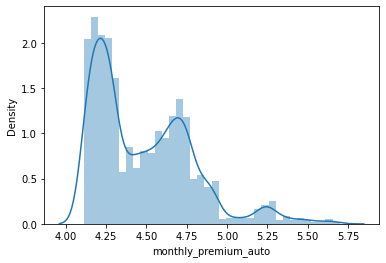

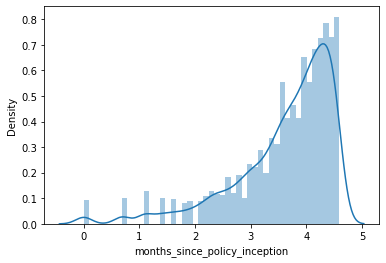

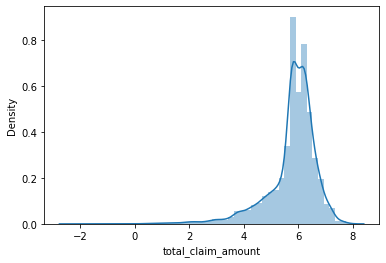

In [224]:
for col in df.select_dtypes(np.number).columns:
    sns.distplot(df[col])
    plt.show()

In [225]:
for col in df.select_dtypes(np.number):
    threshold = 2
    upper = np.percentile(df[col],75)
    lower = np.percentile(df[col],25)
    iqr = upper - lower
    upper_limit = upper + threshold * iqr
    lower_limit = lower - threshold * iqr
    wo_outliers = df[(df[col]>lower_limit) & (df[col]<upper_limit)]

In [226]:
print(f'Percentage of rows lost: {100-len(wo_outliers)/len(df)*100} %')

Percentage of rows lost: 6.514123056711185 %


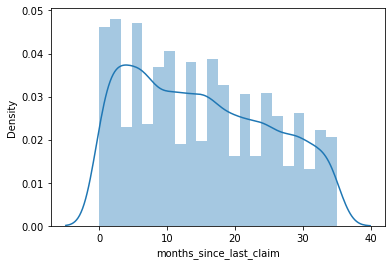

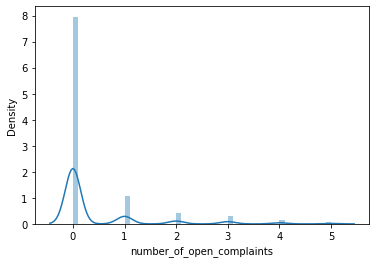

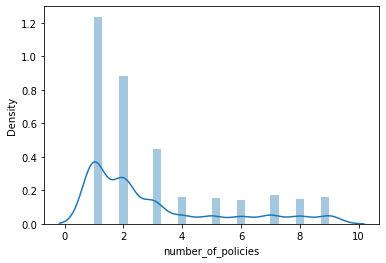

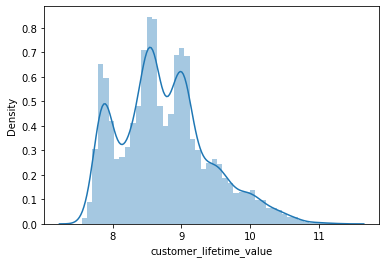

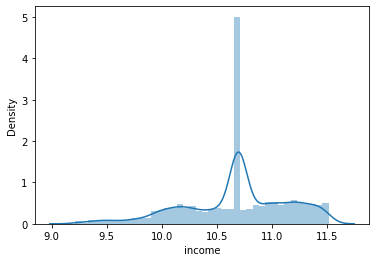

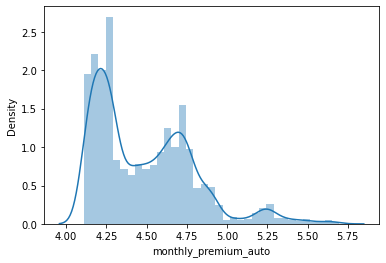

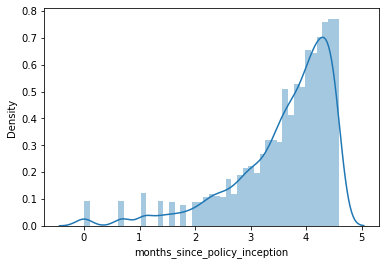

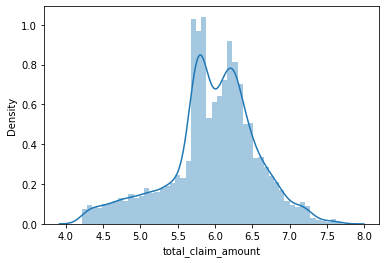

In [227]:
for col in wo_outliers.select_dtypes(np.number).columns:
    sns.distplot(wo_outliers[col])
    plt.show()

2. Create a copy of the dataframe for the data wrangling.

In [228]:
data_wrangling = wo_outliers.copy()
#data_wrangling.dtypes

3. Normalize the continuous variables. You can use any one method you want.

In [229]:
# 1. X/y split
X = data_wrangling.drop('customer_lifetime_value', axis=1)
y = data_wrangling['customer_lifetime_value']

In [230]:
# 2. X split into numericals and categoricals
X_num = X.select_dtypes(np.number)
X_cat = X.select_dtypes(np.object)
X_num.shape, X_cat.shape

((8539, 7), (8539, 14))

In [231]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
transformer.fit(X_num) # 3. We fit the numerical data 
x_normalized = transformer.transform(X_num) # 4. We transform the numerical data

In [232]:
x_normalized.shape

(8539, 7)

4. Encode the categorical variables

In [234]:
X_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [235]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)
encoded1 = encoder.transform(X_cat).toarray()
encoded1.shape

(8539, 43)

# Lab | Random variable distributions

1. Get the numerical variables from our dataset.

* See above

2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

* See above 

3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


* See above 

# Lab | Comparing regression models

1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [236]:
X = np.concatenate((x_normalized, encoded1), axis=1)

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

2. Try a simple linear regression with all the data to see whether we are getting good results.

In [238]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
predictions = lr.predict(X_test)

In [239]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [240]:
print('R2 score:', r2_score(y_test, predictions)), 
print('MAE:', mean_absolute_error(y_test, predictions)) 
print('MSE:', mean_squared_error(y_test, predictions, squared=False))

R2 score: 0.24211912757407528
MAE: 0.4343073020702067
MSE: 0.5644865274188867


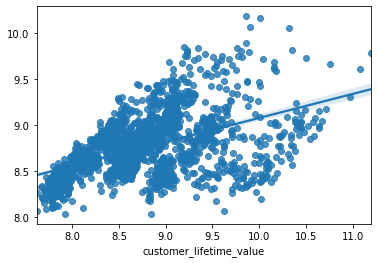

In [241]:
sns.regplot(y_test, predictions)
plt.show()

These results are terrible

3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from xgboost import XGBRegressor

In [246]:
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=5), MLPRegressor(), RandomForestRegressor(), tree.DecisionTreeRegressor(), XGBRegressor()]

In [260]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [265]:
def func1(wo_outliers, model_list):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    for model in models:
        predictions = model.predict(X_test)
        print(model.fit(X_train, y_train),':')
        print('R2 score:', r2_score(y_test, predictions))
        print('MAE:', np.exp(mean_absolute_error(y_test, predictions)))
        print('MSE:', np.exp(mean_squared_error(y_test, predictions, squared=False)), '\n')

In [266]:
func1(wo_outliers, model_list)

LinearRegression() :
R2 score: 0.24211912757407528
MAE: 1.5438932368133635
MSE: 1.7585445864305966 

KNeighborsRegressor() :
R2 score: 0.09116752227582015
MAE: 1.6122563476766198
MSE: 1.8554952506175628 

MLPRegressor() :
R2 score: 0.4238725994757985
MAE: 1.4378557888510615
MSE: 1.6358570667907073 

RandomForestRegressor() :
R2 score: 0.8945607204573165
MAE: 1.1254573978212847
MSE: 1.2343562171871783 

DecisionTreeRegressor() :
R2 score: 0.8105285000008438
MAE: 1.1523843964730869
MSE: 1.326102539203571 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, su

4. Use the function to check LinearRegressor and KNeighborsRegressor.

* See above

5. You can check also the MLPRegressor for this task!

* See above

6. Check and discuss the results.

* Random forest regressor and XGBRegressor give excellent results